# protostars
## 05- Solid angle ratio
### V. Figure out the flux ratio problem

Spot check

gully  
March 15, 2017

In [1]:
import Starfish
from Starfish.grid_tools import PHOENIXGridInterfaceNoAlpha as PHOENIX
mygrid = PHOENIX(norm=False, base='/Users/gully/GitHub/Starfish/libraries/raw/PHOENIX/')
mygrid2 = PHOENIX(norm=True, base='/Users/gully/GitHub/Starfish/libraries/raw/PHOENIX/')

/Users/gully/GitHub/Starfish/Starfish/__init__.py:16: UserWarning: Using the default config.yaml file located at /Users/gully/GitHub/Starfish/Starfish/config.yaml. This is likely NOT what you want. Please create a similar 'config.yaml' file in your current working directory.
  warnings.warn("Using the default config.yaml file located at {0}. This is likely NOT what you want. Please create a similar 'config.yaml' file in your current working directory.".format(default), UserWarning)


In [2]:
teff = 2700
y, hdr = mygrid2.load_flux([teff, 3.5, 0], norm=True)

In [3]:
teff2 = 4100
y2, hdr2 = mygrid2.load_flux([teff2, 3.5, 0], norm=True)

In [4]:
x = mygrid2.wl

In [5]:
y

array([   575.14154053,    352.50616455,    138.3377533 , ...,
        92252.4453125 ,  97700.328125  ,  95414.953125  ], dtype=float32)

(14500, 24500)

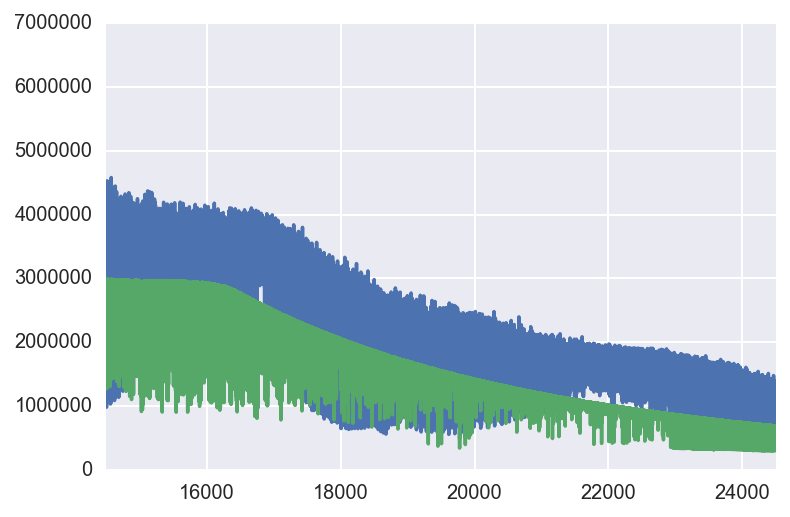

In [6]:
plt.plot(x, y)
plt.plot(x, y2)
plt.xlim(14500, 24500)

(14500, 24500)

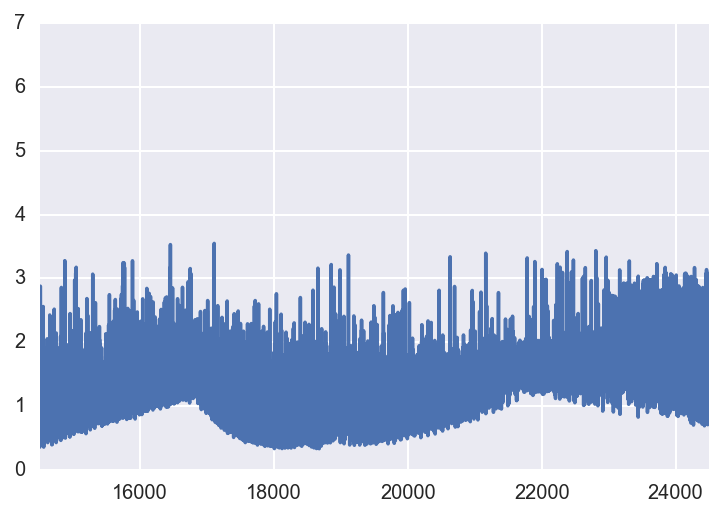

In [7]:
plt.plot(x, y/y2)
plt.xlim(14500, 24500)

In [8]:
from astropy.convolution import convolve, Box1DKernel

In [9]:
ratio = y/y2

In [10]:
smoothed_signal = convolve(ratio, Box1DKernel(350))

In [11]:
np.median(y/y2)

0.85484958

(14500, 24500)

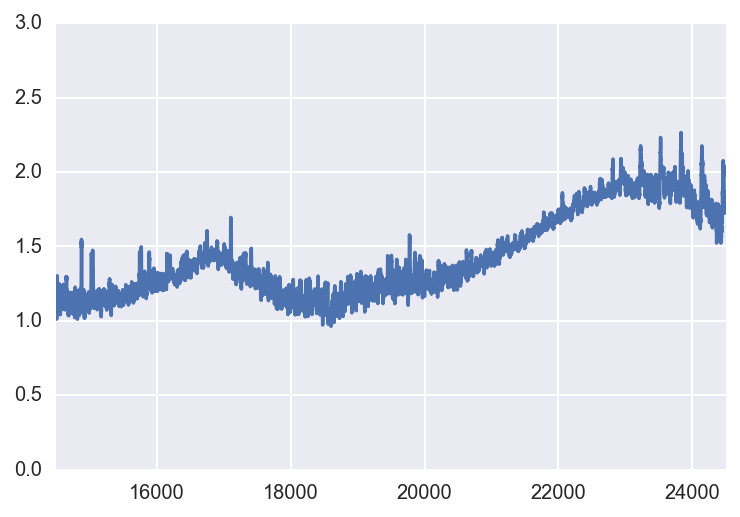

In [12]:
plt.plot(x, smoothed_signal)
plt.xlim(14500, 24500)

Wow, luckily the absolute values don't make a huge difference through much of $H-$ band.  $K-$ band is a bit more biased.  Could explain the large variance in K-band posteriors.  Wow!